In [1]:
__author__ = 'racah'
import numpy as np
import os
import pickle
import sys
import h5py
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from util.data_loaders import load_ibd_pairs, get_ibd_data
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from networks.evdcae_net import DenoisingConvAe
from util.helper_fxns import create_run_dir, make_accidentals
from networks.print_n_plot import  calc_plot_n_save_tsne
import logging
import argparse
%matplotlib inline

'''1) Primary AD           10000 or 1
 2) Delayed AD response  01000 or 2
 3) Muon decay           00100 or 3
 4) Flasher              00010 or 4
 5) Other (background noise) 00001 or 5'''




importing Jupyter notebook from networks/evdcae_net.ipynb
importing Jupyter notebook from networks/print_n_plot.ipynb
importing Jupyter notebook from networks/build_evdcae.ipynb
importing Jupyter notebook from networks/train_val.ipynb
importing Jupyter notebook from util/helper_fxns.ipynb


'1) Primary AD           10000 or 1\n 2) Delayed AD response  01000 or 2\n 3) Muon decay           00100 or 3\n 4) Flasher              00010 or 4\n 5) Other (background noise) 00001 or 5'

Building model and compiling functions...
(None, 2, 8, 24)
(None, 128, 11, 12)
(None, 128, 6, 6)
(None, 1024)
(None, 4608)
(None, 128, 6, 6)
(None, 128, 11, 12)
(None, 2, 8, 24)
Starting training...
Epoch 1 of 11 took 0.666s
	training los:		0.2222
	training acc:		19.8691 %
  validation loss:		0.232318
  validation accuracy:		23.23 %


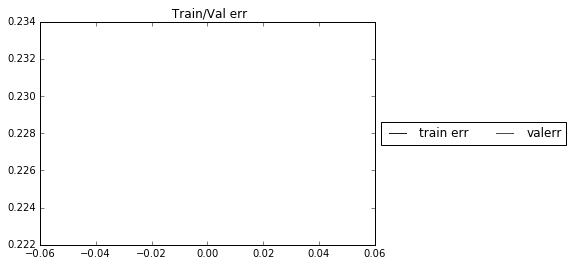

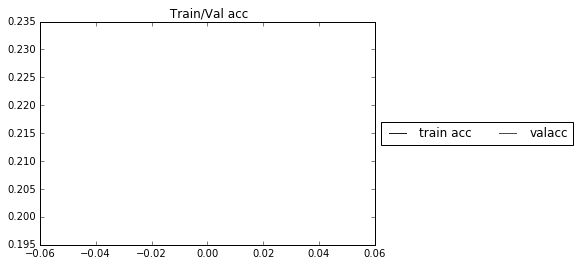

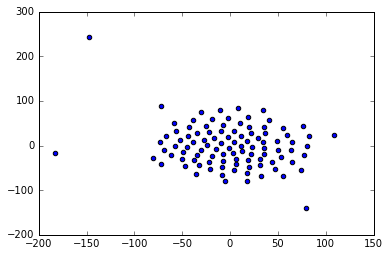

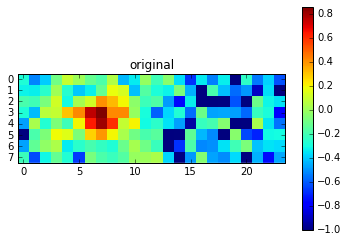

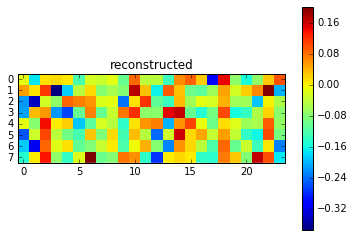

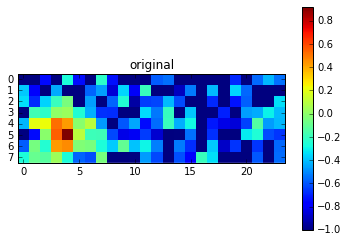

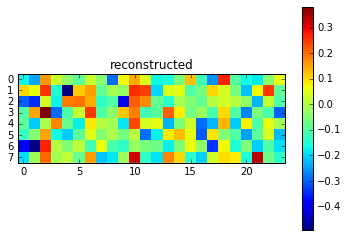

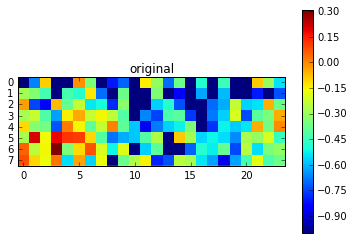

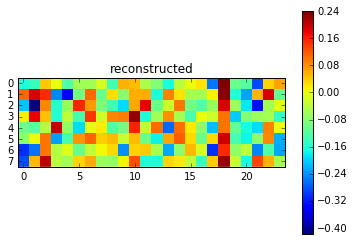

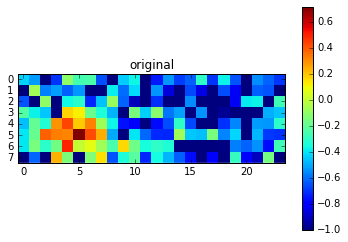

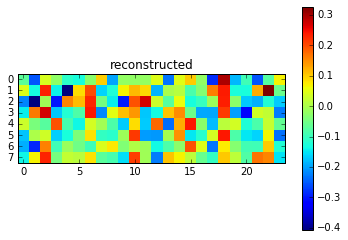

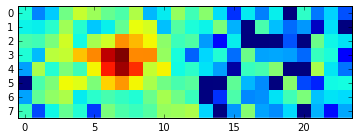

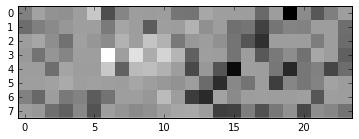

Epoch 2 of 11 took 0.626s
	training los:		0.1980
	training acc:		17.0779 %
  validation loss:		0.204672
  validation accuracy:		20.47 %
Epoch 3 of 11 took 0.609s
	training los:		0.1710
	training acc:		14.5175 %
  validation loss:		0.176581
  validation accuracy:		17.66 %
Epoch 4 of 11 took 0.615s
	training los:		0.1453
	training acc:		12.4679 %
  validation loss:		0.155171
  validation accuracy:		15.52 %
Epoch 5 of 11 took 0.612s
	training los:		0.1249
	training acc:		11.0019 %
  validation loss:		0.140023
  validation accuracy:		14.00 %
Epoch 6 of 11 took 0.612s
	training los:		0.1103
	training acc:		10.2087 %
  validation loss:		0.130659
  validation accuracy:		13.07 %
Epoch 7 of 11 took 0.612s
	training los:		0.1019
	training acc:		9.8318 %
  validation loss:		0.125669
  validation accuracy:		12.57 %
Epoch 8 of 11 took 0.611s
	training los:		0.0983
	training acc:		9.8157 %
  validation loss:		0.125785
  validation accuracy:		12.58 %
Epoch 9 of 11 took 0.614s
	training los:		0.0983
	

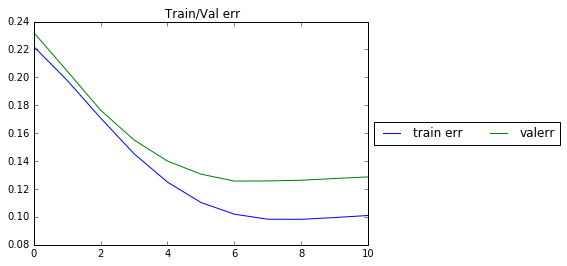

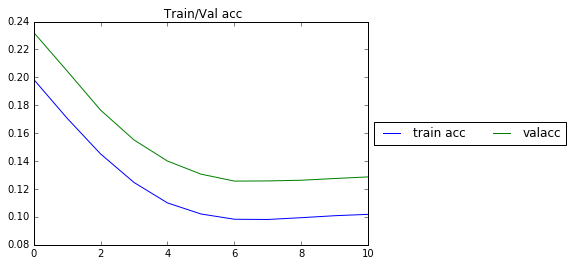

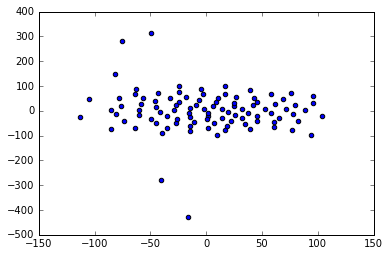

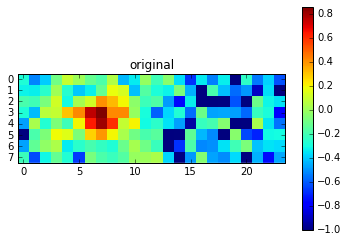

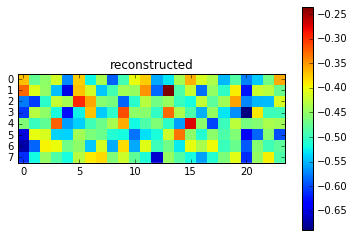

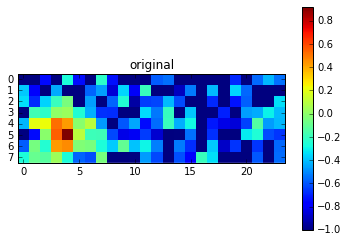

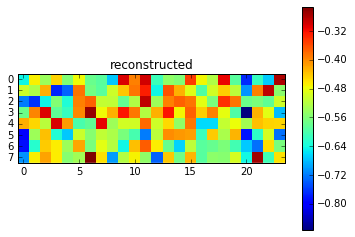

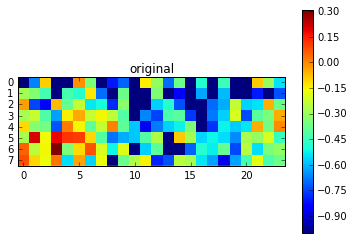

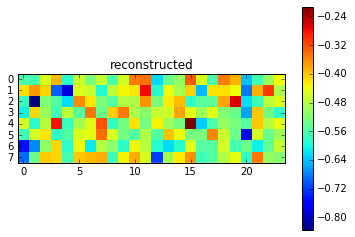

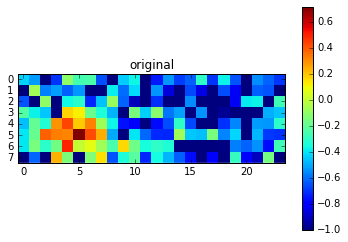

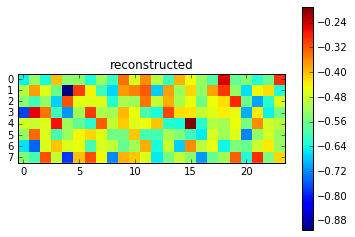

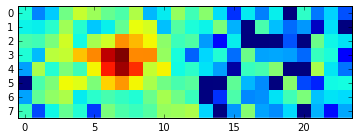

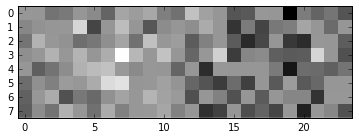

In [2]:
if __name__ == "__main__":
    epochs =11
    numpairs = 200
    learn_rate = 0.01
    
#     parser = argparse.ArgumentParser()
#     parser.add_argument('-e', '--epochs', type=int, default=1,
#         help='number of epochs for training')
#     parser.add_argument('-w', '--bottleneck-width', type=int, default=10,
#         help='number of features in the bottleneck layer')
#     parser.add_argument('-n', '--numpairs', type=int, default=200,
#         help='number of IBD pairs to use')
#     parser.add_argument('-l', '--learn_rate', default=0.01, type=float,
#         help='the learning rate for the network')

#     parser.add_argument('--accidental-fraction', type=float, default=0,
#         help='fraction of train, test, and val sets that are' +
#         ' intentionally accidentals')
#     args = parser.parse_args()
#     epochs = args.epochs
#     numpairs = args.numpairs
#     learn_rate = args.learn_rate
    
    run_dir = create_run_dir()
    
    
    
    x_train, x_val, x_test = get_ibd_data(tot_num_pairs=numpairs, preprocess=True, just_charges=True)
    
    make_accidentals(x_train)
    
    dca = DenoisingConvAe(network_kwargs={'learning_rate':learn_rate}, 
                          train_kwargs={'num_epochs': epochs, 'save_path': run_dir})

    dca.fit(x_train,x_train,x_val,x_val)

#     rec= dca.predict(x_train)

#     hlayer = dca.extract_hidden_layer(x_train)
    
    #calc_plot_n_save_tsne(x_train, hlayer, run_dir)
    
    